In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

In [67]:
df = pd.read_csv("run_log_st11.csv", delimiter='\t', names=["doi", 'filename', 'comm_no', 'dep_no', 'encoding', 'total_lines'])

In [68]:
df.head(3)

,doi,filename,comm_no,dep_no,encoding,total_lines
0,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,13,4,Windows-1252,188
1,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,8,4,Windows-1252,153
2,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,4,3,Windows-1252,37


# Convert to numbers ...

In [69]:
def column_to_int(el):
    el = el.strip()
    
    if el.isdigit():
        return float(el.split()[0])
    else:
        print(el)  
        return np.nan
    
df['total_lines_int']=df["total_lines"].apply(column_to_int)

simple slopes
13 state south.R
OA3
2 and 3.R


In [70]:
df['comm_to_int']=df["comm_no"].apply(column_to_int)

and main effects.R
OA4


In [71]:
df['dep_to_int']=df["dep_no"].apply(column_to_int)

OA5


# Relative no of comments

In [72]:
df.head()

,doi,filename,comm_no,dep_no,encoding,total_lines,total_lines_int,comm_to_int,dep_to_int
0,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,13,4,Windows-1252,188,188.0,13.0,4.0
1,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,8,4,Windows-1252,153,153.0,8.0,4.0
2,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,4,3,Windows-1252,37,37.0,4.0,3.0
3,doi:10.7910/DVN/BPON3K,fig_13_plot_loyalty_df_pct.R,3,5,ascii,27,27.0,3.0,5.0
4,doi:10.7910/DVN/BPON3K,fig_14_effect_on_individual_parties.R,1,0,ascii,1,1.0,1.0,0.0


In [73]:
# ( total lines - no of comments ) / no of comments
df['comm_rel']=(df['total_lines_int']-df['comm_to_int'])/df['comm_to_int']
df['comm_rel']=df['comm_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

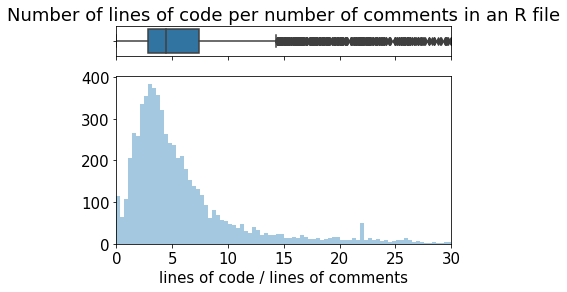

In [74]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["comm_rel"], ax=ax_box)
sns.distplot(df["comm_rel"].dropna(), ax=ax_hist, kde=False, bins=800)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per number of comments in an R file')
ax_hist.set(xlabel="lines of code / lines of comments")
#plt.xscale('log')
plt.xlim(0, 30)
plt.show()

f.tight_layout()
f.savefig("plots/rel_comments.png", dpi=100)

# Relative no of dependencies

In [75]:
# ( total lines - no of comments ) / no of comments
df['dep_rel']=(df['total_lines_int']-df['dep_to_int'])/df['dep_to_int']
df['dep_rel']=df['dep_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

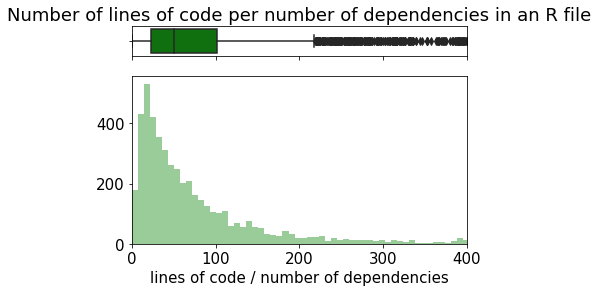

In [76]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["dep_rel"], color='g', ax=ax_box)
sns.distplot(df["dep_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=900)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per number of dependencies in an R file')
ax_hist.set(xlabel="lines of code / number of dependencies")
#plt.xscale('log')
plt.xlim(0, 400)
plt.show()

f.tight_layout()
f.savefig("plots/rel_dep.png", dpi=100)

# Encoding

In [77]:
temo = df.encoding.value_counts().reset_index().head(4)

In [78]:
labels = temo['index']
labels = labels.append(pd.Series('other'))

In [79]:
sizes = temo['encoding']
sizes = sizes.append(pd.Series(64))

In [80]:
labels

0           ascii
1           utf-8
2      ISO-8859-1
3    Windows-1252
0           other
dtype: object

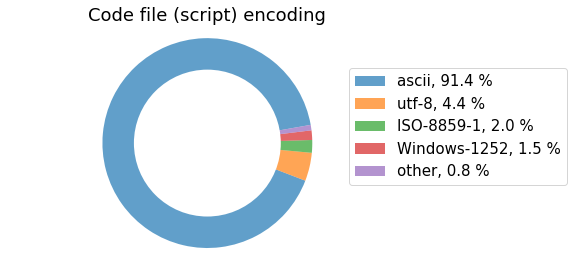

In [81]:
# Pie chart
#labels = ['Yes',  'No']
#sizes = [(df['docs'] == 1).sum(), (df['docs'] == 0).sum()]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
pie = ax1.pie(sizes,   startangle=10, \
        textprops={'fontsize': 12},wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Code file (script) encoding", size=18)
plt.tight_layout()

#ax2 = fig.add_subplot(212)
#ax2.axis("off") 
#ax2.legend(pie[0],labels, loc="center")
total = sizes.sum()
plt.legend(
    pie[0],labels=['%s, %1.1f %%' % (l, s*100.0/total) for l, s in zip(labels, sizes)], \
    bbox_to_anchor=(1.35,0.3), loc="lower right", \
    bbox_transform=plt.gcf().transFigure)

plt.show()
fig.savefig("plots/encoding.png", bbox_inches="tight")